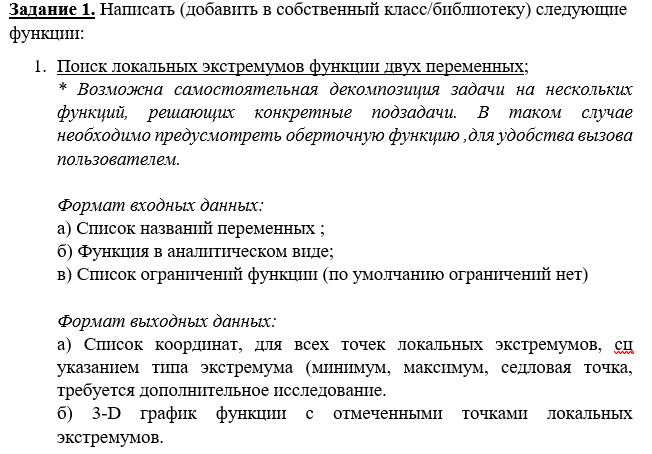

In [1]:
from sympy import *

In [32]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt


In [4]:
def inputChastProizv():
    params = input('Введите названия переменных: ')
    params = params.split(' ')
    if len(params) > 2:
        print('Введено более двух переменных')
    elif len(params) < 2:
        print('Введено менее двух переменных')
    F = input('Функция в аналитическом виде :  ')
    lim1 = input(f'Ограничения для {params[0]} через пробел :  ')
    lim1 = lim1.split(' ')
    lim2 = input(f'Ограничения для {params[1]} через пробел :  ')
    lim2 = lim2.split(' ')
    Final = {'p1': params[0],
             'p2': params[1],
             'func': F,
             'lims1': lim1,
             'lims2': lim2}
    return Final

In [5]:
inputChastProizv()
# y*(x**2)+x*(y**3)-x*y

Введите названия переменных: x y
Функция в аналитическом виде :  y*(x**2)+x*(y**3)-x*y
Ограничения для x через пробел :  -10 10
Ограничения для y через пробел :  -1 1


{'p1': 'x',
 'p2': 'y',
 'func': 'y*(x**2)+x*(y**3)-x*y',
 'lims1': ['-10', '10'],
 'lims2': ['-1', '1']}

In [30]:
def chastproizv(dictionary):
    # преобразование данных для символьного вычислнения
    from sympy.parsing.sympy_parser import parse_expr
    data = dictionary
    func = data['func']
    func = parse_expr(func)
    p1 = data['p1']
    x = Symbol(p1)
    p2 = data['p2']
    y = Symbol(p2)
    
    # реализация метода
    
    dx = func.diff(p1)
    dy = func.diff(p2)
    points = solve((dx,dy), [x,y], dict = True)
    for i in points:
        A = dx.diff(p1)
        B = dx.diff(p2)
        C = dy.diff(p2)
        A = A.subs([(x, i[x]), (y, i[y])])
        B = B.subs([(x, i[x]), (y, i[y])])
        C = C.subs([(x, i[x]), (y, i[y])])
        if A*C-B**2>0:
            
            if A>0:
                print(i, 'условный минимум')
            elif A<0:
                print(i, 'условный максимум')
        elif A*C-B**2<0:
            print(f'В точке {i} нет экстремума - седловая точка')
        elif A*C-B**2==0:
            print('Требуется дополнительное исследование')

In [37]:
data1 = {'p1': 'x',
 'p2': 'y',
 'func': 'y*(x**2)+x*(y**3)-x*y',
 'lims1': ['-10', '10'],
 'lims2': ['-1', '1']}
chastproizv(data1)

В точке {x: 0, y: -1} нет экстремума - седловая точка
В точке {x: 0, y: 0} нет экстремума - седловая точка
В точке {x: 0, y: 1} нет экстремума - седловая точка
{x: 2/5, y: -sqrt(5)/5} условный максимум
{x: 2/5, y: sqrt(5)/5} условный минимум
В точке {x: 1, y: 0} нет экстремума - седловая точка


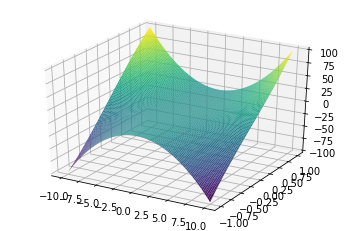

In [36]:
#create 3d axes
fig = plt.figure()
ax = plt.axes(projection='3d')

def f(x, y): 
    return y*(x**2)+x*(y**3)-x*y
  
# x and y values
x = np.linspace(-10, 10, 100)
y = np.linspace(-1, 1, 100)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

ax = plt.axes(projection ='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap='viridis')

plt.show()


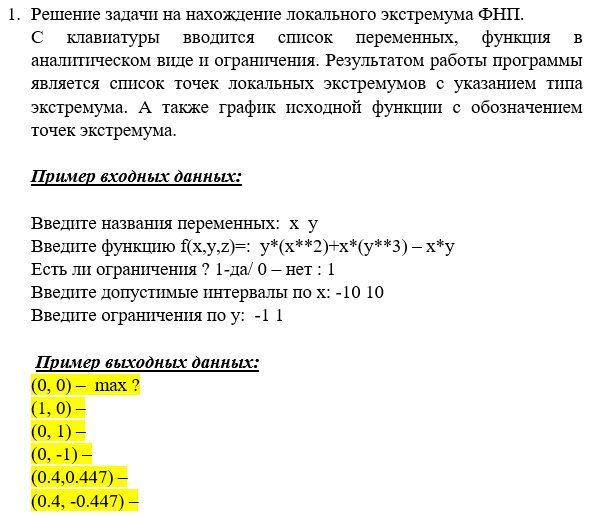